In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_regression

(500, 1) (500,)


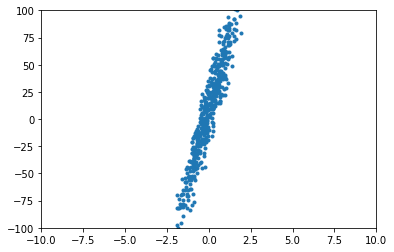

In [18]:
x,y = make_regression(n_samples=500,n_features=1,bias=10,noise=15)
print(x.shape,y.shape)

plt.xlim(-10,10)
plt.ylim(-100,100)

plt.plot(x,y,'.')
plt.show()

In [19]:
split = int(0.8*x.shape[0])
x_train = x[:split]
x_test = x[split:]
y_train =y[:split]
y_test = y[split:]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(400, 1)
(400,)
(100, 1)
(100,)


In [20]:
def hypothesis(x,w):
    x0 = 1
    x1 = x
    return w[0]*x0 + w[1]*x1

In [21]:
def get_error(x,w,y_true):
    err=0.0
    m = x.shape[0]
    
    for i in range (m):
        err += (hypothesis(x[i],w)-y_true[i])**2
        
    err = err/(2*m)
    return err

In [22]:
def gradient_descent(x,w,y_true, learning_rate=0.1):
    error = get_error(x,w,y_true)
    m = x.shape[0]
    grad0 = 0.0
    grad1 = 0.0
    for i in range(m):
        grad0 +=(y_true[i] - hypothesis(x[i],w)) 
        grad1 +=(y_true[i] - hypothesis(x[i],w))*(x[i])
    grad0 /= m 
    grad1 /= m
    w[0] += learning_rate * grad0
    w[1] += learning_rate * grad1
    return error, w
        
        

In [23]:
w = np.array([0.1,0.1])
loss = []

for i in range(1000):
    err , w = gradient_descent(x_train, w , y_train,learning_rate=0.1)
    loss.append(err)
print(w)
    

[10.16351085 52.93503213]


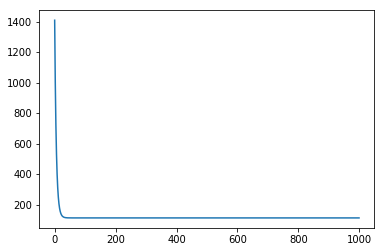

In [24]:
plt.plot(loss)
plt.show()

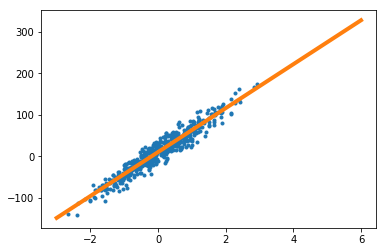

In [27]:
plt.plot(x,y,'.')
x_hyp = np.arange(-3,7)
y_hyp = w[0] + w[1]*x_hyp
plt.plot(x_hyp,y_hyp,linewidth=4,markersize=10)
plt.show()

# stochastic gradient descent

In [58]:
def stochastic_gradient_descent(x,w,y_true,learning_rate=0.1):
    m = x.shape[0]
    loss = []
    for i in range(m):
        grad0 = (y_true[i] - hypothesis(x[i], w))
        grad1 = (y_true[i] - hypothesis(x[i], w))*x[i]
        w[0]  += learning_rate * grad0
        w[1]  += learning_rate * grad1
        err = get_error(x,w,y_true)
        loss.append(err)
    return loss,w

    

In [62]:
w = np.array([0.1, 0.1])
loss, w = stochastic_gradient_descent(x_train, w, y_train)
print(w)

[ 5.09993866 50.60298098]


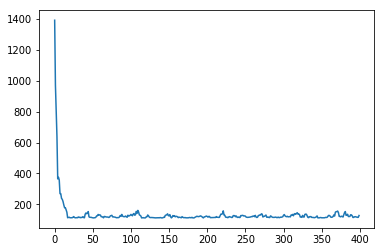

In [63]:
plt.plot(loss)
plt.show()

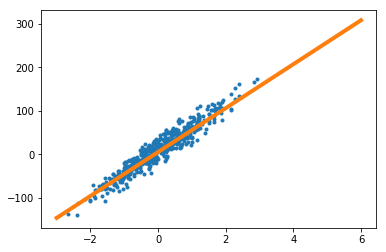

In [64]:
plt.plot(x,y,'.')
x_hyp = np.arange(-3,7)
y_hyp = w[0] + w[1]*x_hyp
plt.plot(x_hyp,y_hyp,linewidth=4,markersize=10)
plt.show()

In [65]:
from sklearn.linear_model import LinearRegression

In [67]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [73]:
lr.score(x_test, y_test)

0.9326004953665564

In [71]:
lr.coef_

array([52.93503213])

In [72]:
lr.intercept_

10.163510849850944